In [1]:
%cd ..

/home/haryoaw/documents/courses/nlp804/project


In [2]:
import pandas as pd

In [3]:
df_verbbose = pd.read_csv("play2/wvs7.csv")
df_verbbose.columns

Index(['version', 'doi', 'S002VS', 'S003', 'COUNTRY_ALPHA', 'COW_NUM',
       'COW_ALPHA', 'S004', 'S006', 'S007',
       ...
       'Y023A', 'Y023B', 'Y023C', 'Y024A', 'Y024B', 'Y024C', 'survself',
       'tradrat5', 'TradAgg', 'SurvSAgg'],
      dtype='object', length=1045)

In [4]:
df_verbbose[df_verbbose['COUNTRY_ALPHA'] == "EGY"]

,version,doi,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,S007,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
85236,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818070001,818720001,...,NaN,0.000000,1.000000,0.33,0.0,0.165,NaN,NaN,NaN,NaN
85237,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818070002,818720002,...,NaN,0.222222,0.777778,0.66,0.0,0.330,NaN,NaN,NaN,NaN
85238,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818070003,818720003,...,NaN,0.000000,0.777778,0.00,0.0,0.000,NaN,NaN,NaN,NaN
85239,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818070004,818720004,...,NaN,0.000000,0.777778,0.00,0.0,0.000,NaN,NaN,NaN,NaN
85240,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818070005,818720005,...,NaN,0.444444,0.444444,0.00,0.0,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86431,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818071196,818721196,...,NaN,0.000000,0.555556,0.33,0.0,0.165,NaN,NaN,NaN,NaN
86432,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818071197,818721197,...,NaN,0.222222,0.444444,0.00,0.5,0.250,NaN,NaN,NaN,NaN
86433,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818071198,818721198,...,NaN,0.444444,0.333333,0.33,0.5,0.415,NaN,NaN,NaN,NaN
86434,4-0-0,doi:10.14281/18241.22,7,818,EGY,651,EGY,-4,818071199,818721199,...,NaN,0.444444,0.555556,0.00,0.0,0.000,NaN,NaN,NaN,NaN


In [5]:
# NIGERIA == 566
# Indonesia == 360
# China == 156
# India == 356
# USA == 2
# Russia == 643
# Ecuador == 218
# Egypt == 818


In [6]:
s03_code = [566, 360, 156, 840, 643, 218, 818]
country_column = ["Nigeria", "Indonesia", "China", "USA", "Russia", "Ecuador", "Egypt"]
columns_to_plot = [
    'A008',
    'A165',
    'E018',
    'E025',
    'F063',
    'F118',
    'F120',
    'G006',
    'Y003',
    'Y002',
]


df_filtered = df_verbbose[columns_to_plot]

In [7]:
df_filtered.Y003

0        0
1       -1
2        2
3        0
4        1
        ..
94273   -1
94274    1
94275   -1
94276    1
94277    0
Name: Y003, Length: 94278, dtype: int64

In [311]:
s03_code = [566, 360, 156, 840, 643, 218, 818]
country_column = ["Nigeria", "Indonesia", "China", "USA", "Russia", "Ecuador", "Egypt"]
columns_to_plot = [
    'A008',
    'A165',
    'E018',
    'E025',
    'F063',
    'F118',
    'F120',
    'G006',
    'Y003',
    'Y002'
]

df_aggregated_real = pd.DataFrame()

for code in s03_code:
    df_filtered = df_verbbose[df_verbbose['S003'] == code][columns_to_plot]
    # add y002 by 2 
    df_filtered['Y003'] = df_filtered['Y003'] + 2
    df_filtered = df_filtered.apply(lambda x: x.mask(x < 0))
    df_filtered['Y003'] = df_filtered['Y003'] - 2
    df_filtered = df_filtered.mean()
    df_aggregated_real = pd.concat([df_aggregated_real, df_filtered], axis=1)
df_aggregated_real.columns = country_column


"""
happiness-q46: Secara umum, apakah saudara mengatakan bahwa saudara adalah \n 1. Sangat bahagia, 2. Cukup bahagia, 3. Tidak terlalu bahagia, 4. Tidak bahagia sama sekali
trust-q57: Secara umum, menurut saudara apakah kebanyakan orang bisa dipercaya atau saudara merasa harus hati-hati jika berhadapan dengan orang lain? \n 1. Kebanyakan orang bisa dipercaya 2. Harus hati-hati
authority-q45: Saya akan membacakan beberapa perubahan cara hidup yang mungkin terjadi dalam waktu dekat. Menurut pendapat saudara jika perubahan itu benar terjadi, apakah akan menjadi hal yang baik, buruk atau tidak peduli. Penghargaan yang lebih besar terhadap penguasa. \n 1. Baik 2. Tidak peduli 3. Buruk
petition-q209: Saya akan membacakan beberapa tindakan politik yang bisa dilakukan oleh seseorang. Manakah dari tindakan berikut yang I/B/S pernah melakukan, mungkin akan melakukan, atau tidak akan pernah melakukan? Mendatangi petisi \n 1. Pernah melakukan 2. Mungkin akan melakukan 3. Tidak akan pernah melakukan
god-q164: Seberapa penting Tuhan dalam hidup I/B/S? Gunakan angka skala 1-10 dimana 10 berarti sangat penting dan 1 berarti tidak penting sama sekali. 1 2 3 4 5 6 7 8 9 10
homosexuality-q182: Dari tindakan-tindakan dibawah ini, menurut I/B/S tindakan manakah yang selalu bisa dibenarkan, tidak pernah bisa dibenarkan atau diantara keduanya? Homoseksual (hubungan sesama jenis) (1 Tidak pernah bisa dibenarkan - 10 Selalu bisa dibenarkan) 1 2 3 4 5 6 7 8 9 10
abortion-q184: Dari tindakan-tindakan dibawah ini, menurut I/B/S tindakan manakah yang selalu bisa dibenarkan, tidak pernah bisa dibenarkan atau diantara keduanya? Aborsi (hubungan sesama jenis) (1 Tidak pernah bisa dibenarkan - 10 Selalu bisa dibenarkan) 1 2 3 4 5 6 7 8 9 10
proud-q254: Seberapa bangga saudara menjadi warga negara {country}? 1. Sangat bangga 2. Cukup bangga 3. Tidak terlalu bangga 4. Tidak bangga sama sekali
child-obey1-q8: Berikut ini adalah daftar dimana anak-anak dapat didorong untuk mempelajarinya di rumah. Jika ada, yang mana menurut I/B/S penting? PILIH MAKSIMAL LIMA SAJA \n 1. Perilaku yang baik 2. Kemandirian 3. Bekerja keras 4. Bertanggung jawab 5. Berimajinasi 6. Tenggang rasa dan menghargai orang lain 7. Hemat 8. Tekun 9. Taat pada agama 10. Tidak mementingkan diri sendiri 11. Patuh
materialistic-q155: Jika Saudara harus memilih salah satu hal yang tertulis di kartu ini, manakah yang menurut Saudara paling penting? Dan manakah yang menurut I/B/S paling penting yang kedua? Jawab dengan memilih dua pilihan! \n 1. Menjaga ketertiban bangsa 2. Memberi kesempatan yang lebih besar pada masyarakat terlibat dalam keputusan pemerintah 3. Melawan kenaikan harga 4. Melindungi kebebasan berbicara
"""
indexes = [
    "happiness-q46",
    "trust-q57",
    "authority-q45",
    "petition-q209",
    "god-q164",
    "homosexuality-q182",
    "abortion-q184",
    "proud-q254",
    "child-obey1-q8",
    "materialistic-q155",
]

In [312]:
df_aggregated_real.index = indexes

In [313]:
df_aggregated_real

,Nigeria,Indonesia,China,USA,Russia,Ecuador,Egypt
happiness-q46,1.891322,1.629572,1.850741,1.882148,2.019329,1.501695,2.273561
trust-q57,1.873171,1.948109,1.345630,1.602629,1.760907,1.941376,1.926483
authority-q45,1.099676,1.909033,1.568575,1.564341,1.558504,1.121644,1.310219
petition-q209,2.590986,2.632422,2.406903,1.459743,2.433158,2.378608,2.827468
god-q164,9.459984,9.770938,2.803306,6.717611,6.293124,9.233333,9.957358
homosexuality-q182,1.500000,1.610223,2.318017,6.496865,2.604513,3.704605,NaN
abortion-q184,1.708706,1.576261,2.437231,5.067004,4.576856,2.550126,2.061603
proud-q254,1.428803,1.219962,1.639454,1.844383,1.653212,1.183725,1.578727
child-obey1-q8,-0.774454,-0.283438,0.927201,0.452546,0.444751,-0.680833,-1.122602
materialistic-q155,1.799153,1.833808,1.544902,2.125100,1.505413,1.866779,1.286815


In [314]:
df_aggregated_real = df_aggregated_real.fillna(0)

In [400]:
df_aggregated_real.to_csv("data/real_survey_answers.csv")

In [315]:
from survey_llm.post_preprocess import create_csv_given_json_answer

In [316]:
create_csv_given_json_answer("scores/real_scores.csv", "survey_output/*.json")

In [317]:
# min_max
normalization = {
    "happiness-q46": [1,4],
    "trust-q57": [1,2],
    "authority-q45": [1,3],
    "petition-q209": [1,3],
    "god-q164": [1,10],
    "homosexuality-q182": [1, 10],
    "abortion-q184": [1,10],
    "proud-q254": [1,4],
    "child-obey1-q8": [-2,2],
    "materialistic-q155": [1,3]
}

In [318]:
df_llm_scores = pd.read_csv("scores/real_scores.csv")

In [319]:
df_llm_scores.columns

Index(['Question', 'non-en-SAILOR-prompt3', 'ind-MISTRAL-prompt1',
       'ecu-SAILOR-prompt2', 'hau-QWEN-prompt1', 'egp-QWEN-prompt1',
       'non-id-MISTRAL-prompt2', 'non-rus-GEMMA-prompt1', 'hau-SAILOR-prompt2',
       'non-ecu-MISTRAL-prompt1',
       ...
       'ch-SAILOR-prompt2', 'rus-SAILOR-prompt3', 'non-ecu-QWEN-prompt1',
       'non-rus-GEMMA-prompt3', 'en-GEMMA-prompt2', 'ind-GEMMA-prompt3',
       'egp-llama3-prompt3', 'non-ch-SAILOR-prompt2', 'egp-QWEN-prompt3',
       'en-llama3-prompt3'],
      dtype='object', length=217)

In [320]:
import re

In [321]:
def normalize_score(scores):
    normalized_score = []
    norm_list = list(normalization.values())
    for i, score in enumerate(scores):
        # scale to 0-10
        # formula is 
        min_sc, max_sc = norm_list[i]
        score = (float(score) - min_sc) / (max_sc - min_sc)
        # make it to 1 - 10 score
        scaled = score * 9 + 1
        normalized_score.append(scaled)
    return normalized_score

In [322]:
import plotly.graph_objects as go
from copy import deepcopy
# Create a radar chart using Plotly
from plotly.subplots import make_subplots

# Names of each arm of the radar chart
def create_plot(score_dict):
    categories = indexes
    

    # Create figure
    
    
    fig = go.Figure()


    # Add traces, one for each model
    for key, score in score_dict.items():
        score_vis = normalize_score(score)
        print(score_vis)
        # score_vis =score
        # print(score_vis)
        fig.add_trace(
            go.Scatterpolar(r=score_vis, theta=categories, fill="toself", name=key)
        )

    # Tune layout and look of the chart

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
        showlegend=True,
        title=dict(text="Radar Chart for Model Comparison"),
    )

    # Show the plot
    fig.show()

def plot_model_cons(lang):
    pattern_en = re.compile(fr"non-{lang}-(.+)-(.+)")
    dict_model_score = {}
    print(pattern_en)

    for column in df_llm_scores.columns:
        # print(column, end=' ')
        if pattern_en.match(column):
            match = pattern_en.match(column)
            dict_model_score.setdefault(match.group(1), {})
            dict_model_score[match.group(1)][match.group(2)] = df_llm_scores[column]
    
    for k, v in dict_model_score.items():
        print(k)
        create_plot(v)
        

In [57]:
plot_model_cons("rus")

re.compile('non-rus-(.+)-(.+)')
GEMMA
[1.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.25, 5.5]
[1.0, 1.0, 10.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.25, 5.5]
[1.0, 1.0, 10.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.25, 5.5]


QWEN
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 5.5, 10.0]
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 5.5, 10.0]
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0]


MISTRAL
[7.0, 10.0, 1.0, 10.0, 10.0, 10.0, 1.0, 4.0, 5.5, 10.0]
[7.0, 10.0, 1.0, 10.0, 10.0, 9.0, 1.0, 4.0, 5.5, 10.0]
[4.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 4.0, 5.5, 10.0]


SAILOR
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 7.75, 10.0]
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 7.75, 10.0]
[4.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 4.0, 7.75, 10.0]


In [323]:
import numpy as np

In [324]:
def calc_mean_euclidean(np_arr):
    # Np array dim is [n, 10]
    dists = []
    for i in range(np_arr.shape[0]):
        for j in range(i+1, np_arr.shape[0]):
            distance = np.linalg.norm(np_arr[i] - np_arr[j])
            dists.append(distance)
    # print(dists)
    return np.mean(dists)

def calculate_euclidean_each_prompt(lang, df_llm_scores):
    pattern_en = re.compile(fr"non-{lang}-(.+)-(.+)")
    dict_model_score = {}
    for column in df_llm_scores.columns:
        if pattern_en.match(column):
            match = pattern_en.match(column)
            dict_model_score.setdefault(match.group(1), {})
            dict_model_score[match.group(1)][match.group(2)] = df_llm_scores[column]
    
    dict_return = {}
    for model, temps in dict_model_score.items():
        temp_value_list = list(temps.values())
        temp_value_list = [normalize_score(x) for x in temp_value_list]
        # print(temp_value_list)
        np_arr = np.array(temp_value_list)
        dict_return[model] = calc_mean_euclidean(np_arr)
    return dict_return


In [325]:
langs_code = ["ch", "ecu", "egp", "en", "hau", "id", "ind", "rus"]
for lang in langs_code:
    print(lang)
    print(calculate_euclidean_each_prompt(lang, df_llm_scores))

ch
{'MISTRAL': 5.792628034501476, 'SAILOR': 11.593376915541201, 'QWEN': 0.0, 'GEMMA': 0.9428090415820635}
ecu
{'MISTRAL': 11.312071897723664, 'SAILOR': 8.848191962583273, 'QWEN': 8.863753427324667, 'GEMMA': 11.65159336607276}
egp
{'MISTRAL': 8.48528137423857, 'QWEN': 0.0, 'GEMMA': 8.562263491044696, 'SAILOR': 0.0}
en
{'SAILOR': 8.48528137423857, 'GEMMA': 0.0, 'MISTRAL': 10.218802609235903, 'QWEN': 6.0}
hau
{'QWEN': 5.647983517643709, 'GEMMA': 6.514667915105844, 'MISTRAL': 14.036219697190084, 'SAILOR': 12.438793109825918}
id
{'MISTRAL': 5.562639046204301, 'GEMMA': 9.38684705206703, 'QWEN': 5.073246275795669, 'SAILOR': 8.48528137423857}
ind
{'GEMMA': 1.1380711874576983, 'SAILOR': 11.126151855064506, 'QWEN': 10.242640687119286, 'MISTRAL': 9.965502208831998}
rus
{'GEMMA': 1.1547005383792515, 'QWEN': 3.0, 'MISTRAL': 8.619857747993196, 'SAILOR': 0.0}


In [326]:
df_llm_scores

,Question,non-en-SAILOR-prompt3,ind-MISTRAL-prompt1,ecu-SAILOR-prompt2,hau-QWEN-prompt1,egp-QWEN-prompt1,non-id-MISTRAL-prompt2,non-rus-GEMMA-prompt1,hau-SAILOR-prompt2,non-ecu-MISTRAL-prompt1,...,ch-SAILOR-prompt2,rus-SAILOR-prompt3,non-ecu-QWEN-prompt1,non-rus-GEMMA-prompt3,en-GEMMA-prompt2,ind-GEMMA-prompt3,egp-llama3-prompt3,non-ch-SAILOR-prompt2,egp-QWEN-prompt3,en-llama3-prompt3
0,happiness-q46,4,3,1,3,4,2,1,4,3,...,2,2,2,1,1,1,4,2,4,4
1,trust-q57,1,1,1,2,2,1,1,2,1,...,1,2,1,1,1,1,2,1,2,2
2,authority-q45,2,2,2,2,2,3,3,2,1,...,1,1,2,3,1,1,2,1,2,2
3,petition-q209,1,3,3,2,3,2,1,2,2,...,1,3,3,1,2,1,3,1,3,3
4,god-q164,10,3,10,10,10,10,1,10,10,...,1,10,10,2,1,1,1,1,10,1
5,homosexuality-q182,10,1,10,10,10,1,1,1,10,...,10,10,10,2,1,2,1,10,8,1
6,abortion-q184,1,1,10,10,10,1,1,1,1,...,10,10,10,2,1,1,1,10,10,1
7,proud-q254,4,3,1,4,4,2,1,4,2,...,1,2,4,1,1,1,4,1,4,4
8,child-obey1-q8,0,0,0,2,0,0,-1,2,0,...,0,1,0,-1,-1,-2,-2,0,0,1
9,materialistic-q155,3,4,3,3,4,4,2,3,3,...,2,3,3,2,2,1,4,2,4,3


In [327]:
df_aggregated_real

,Nigeria,Indonesia,China,USA,Russia,Ecuador,Egypt
happiness-q46,1.891322,1.629572,1.850741,1.882148,2.019329,1.501695,2.273561
trust-q57,1.873171,1.948109,1.345630,1.602629,1.760907,1.941376,1.926483
authority-q45,1.099676,1.909033,1.568575,1.564341,1.558504,1.121644,1.310219
petition-q209,2.590986,2.632422,2.406903,1.459743,2.433158,2.378608,2.827468
god-q164,9.459984,9.770938,2.803306,6.717611,6.293124,9.233333,9.957358
homosexuality-q182,1.500000,1.610223,2.318017,6.496865,2.604513,3.704605,0.000000
abortion-q184,1.708706,1.576261,2.437231,5.067004,4.576856,2.550126,2.061603
proud-q254,1.428803,1.219962,1.639454,1.844383,1.653212,1.183725,1.578727
child-obey1-q8,-0.774454,-0.283438,0.927201,0.452546,0.444751,-0.680833,-1.122602
materialistic-q155,1.799153,1.833808,1.544902,2.125100,1.505413,1.866779,1.286815


In [328]:
df_filtered = df_verbbose[df_verbbose['S003'] == 818][columns_to_plot]
df_filtered = df_filtered.apply(lambda x: x.mask(x < 0))


In [329]:
df_filtered

,A008,A165,E018,E025,F063,F118,F120,G006,Y003,Y002
85236,2.0,2.0,1.0,3.0,10.0,NaN,1.0,2.0,NaN,2.0
85237,4.0,2.0,1.0,3.0,10.0,NaN,3.0,2.0,NaN,2.0
85238,2.0,2.0,1.0,3.0,10.0,NaN,1.0,1.0,NaN,1.0
85239,2.0,2.0,1.0,3.0,10.0,NaN,1.0,1.0,1.0,1.0
85240,3.0,2.0,1.0,3.0,10.0,NaN,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
86431,2.0,2.0,1.0,3.0,10.0,NaN,1.0,1.0,NaN,2.0
86432,3.0,2.0,1.0,3.0,10.0,NaN,3.0,2.0,NaN,1.0
86433,2.0,2.0,1.0,3.0,10.0,NaN,5.0,2.0,NaN,2.0
86434,3.0,2.0,1.0,3.0,10.0,NaN,5.0,1.0,0.0,1.0


In [330]:
df_verbbose[df_verbbose.COUNTRY_ALPHA == "USA"]

,version,doi,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,S007,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
89045,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840071622,840720001,...,0.444444,0.111111,0.444444,0.00,0.0,0.000,0.019335,0.129601,0.108658,0.072997
89046,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840071861,840720002,...,0.444444,0.888889,0.666667,1.00,0.5,0.750,0.680012,-0.048331,-0.177813,1.268822
89047,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840072716,840720003,...,1.000000,0.888889,0.888889,0.33,1.0,0.665,2.555680,0.040687,-0.034494,4.663780
89048,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840072218,840720004,...,0.000000,0.111111,0.444444,0.33,0.0,0.165,0.771128,-0.558856,-0.999758,1.433741
89049,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840073015,840720005,...,0.555556,0.555556,0.666667,1.00,0.0,0.500,1.811549,-0.271376,-0.536915,3.316904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91636,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840072715,840722592,...,0.666667,0.555556,0.555556,0.00,0.0,0.000,NaN,NaN,NaN,NaN
91637,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840071538,840722593,...,0.888889,0.777778,0.777778,1.00,1.0,1.000,0.305818,2.278036,3.567638,0.591530
91638,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840071446,840722594,...,0.444444,0.555556,0.555556,1.00,1.0,1.000,1.001656,-0.739623,-1.290792,1.850997
91639,4-0-0,doi:10.14281/18241.22,7,840,USA,2,USA,-4,840071167,840722595,...,0.555556,0.000000,0.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
countries = ["USA", "IDN", "NGA", "CHN"]
cols = ["A008", "A165", "E018", "E025", "F063", "F118", "F120", "G006", "Y002", "Y003"]

In [7]:
df_verbbose

,version,doi,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,S007,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,4-0-0,doi:10.14281/18241.22,7,20,AND,232,AND,-4,20070001,20720001,...,0.333333,0.111111,0.444444,0.00,0.0,0.000,NaN,NaN,NaN,NaN
1,4-0-0,doi:10.14281/18241.22,7,20,AND,232,AND,-4,20070002,20720002,...,0.888889,0.888889,0.888889,1.00,0.0,0.500,2.352125,-0.408677,-0.757970,4.295347
2,4-0-0,doi:10.14281/18241.22,7,20,AND,232,AND,-4,20070003,20720003,...,1.000000,0.444444,0.555556,0.33,0.5,0.415,0.741679,1.078958,1.637123,1.380439
3,4-0-0,doi:10.14281/18241.22,7,20,AND,232,AND,-4,20070004,20720004,...,0.555556,0.333333,0.888889,0.33,0.5,0.415,NaN,NaN,NaN,NaN
4,4-0-0,doi:10.14281/18241.22,7,20,AND,232,AND,-4,20070005,20720005,...,0.777778,0.444444,0.666667,0.00,0.5,0.250,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94273,4-0-0,doi:10.14281/18241.22,7,909,NIR,202,NIRL,-4,909070443,909070443,...,0.444444,0.222222,0.222222,0.33,0.0,0.165,0.984535,-1.182408,-2.003676,1.820009
94274,4-0-0,doi:10.14281/18241.22,7,909,NIR,202,NIRL,-4,909070444,909070444,...,1.000000,0.666667,0.777778,0.33,0.0,0.165,1.527666,0.768249,1.136881,2.803075
94275,4-0-0,doi:10.14281/18241.22,7,909,NIR,202,NIRL,-4,909070445,909070445,...,0.000000,0.000000,0.000000,0.33,0.0,0.165,0.399649,-1.394810,-2.345644,0.761364
94276,4-0-0,doi:10.14281/18241.22,7,909,NIR,202,NIRL,-4,909070446,909070446,...,1.000000,1.000000,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN


In [332]:
def calculate_euclidean_each_prompt(df_llm_scores, df_real):
    pattern_en = re.compile(r"(.+)-(.+)-prompt1")
    dict_model_score = {"model": [], "score": [], "language": [], "with_country": []}
    for column in df_llm_scores.columns:
        if pattern_en.match(column):
            match = pattern_en.match(column)
            dict_model_score["model"].append(match.group(2))
            lang_with_non = match.group(1)
            dict_model_score["with_country"].append(not "non" in lang_with_non)
            lang = lang_with_non[4:] if "non" in lang_with_non else lang_with_non
            # lang = lang_with_non
            dict_model_score["language"].append(lang)
            dict_model_score["score"].append(np.array(normalize_score(df_llm_scores[column])))
    return pd.DataFrame(dict_model_score)

In [333]:
df_22 = calculate_euclidean_each_prompt(df_llm_scores, df_aggregated_real)

In [334]:
df_22['language'].unique()

array(['ind', 'hau', 'egp', 'rus', 'ecu', 'en', 'ch', 'id'], dtype=object)

In [335]:
mapping = {'en': 'USA', 'ecu': 'Ecuador', 'hau': 'Nigeria', 'egp': 'Egypt', 'id': 'Indonesia', 'rus': 'Russia', 'ch': 'China'}


In [336]:
df_aggregated_real

,Nigeria,Indonesia,China,USA,Russia,Ecuador,Egypt
happiness-q46,1.891322,1.629572,1.850741,1.882148,2.019329,1.501695,2.273561
trust-q57,1.873171,1.948109,1.345630,1.602629,1.760907,1.941376,1.926483
authority-q45,1.099676,1.909033,1.568575,1.564341,1.558504,1.121644,1.310219
petition-q209,2.590986,2.632422,2.406903,1.459743,2.433158,2.378608,2.827468
god-q164,9.459984,9.770938,2.803306,6.717611,6.293124,9.233333,9.957358
homosexuality-q182,1.500000,1.610223,2.318017,6.496865,2.604513,3.704605,0.000000
abortion-q184,1.708706,1.576261,2.437231,5.067004,4.576856,2.550126,2.061603
proud-q254,1.428803,1.219962,1.639454,1.844383,1.653212,1.183725,1.578727
child-obey1-q8,-0.774454,-0.283438,0.927201,0.452546,0.444751,-0.680833,-1.122602
materialistic-q155,1.799153,1.833808,1.544902,2.125100,1.505413,1.866779,1.286815


In [346]:
def map_real(lang, df_real): 
    if lang == 'ind': # no india here
        return []
    score = normalize_score(df_real[mapping[lang]])
    print(score)
    return np.array(score)

In [347]:
df_22['real'] = df_22['language'].apply(lambda x: map_real(x, df_aggregated_real))


[3.6739659367396595, 8.858536585365854, 1.448541329011345, 8.159438775510205, 9.459983831851254, 1.5, 1.7087062652563059, 2.2864077669902914, 3.7574777687954732, 4.5961864406779664]
[4.820683903252711, 9.338345864661655, 2.3959854014598543, 9.223605150214592, 9.957357859531772, 0.0, 2.0616033755274263, 2.7361809045226133, 2.9741451209341117, 2.2906678082191783]
[4.057987492893689, 7.84815864022663, 3.5132689987937273, 7.449211908931699, 6.293123543123542, 2.6045130641330165, 4.576855639976622, 2.9596361569073335, 6.500690607734806, 3.2743589743589747]
[2.505084745762712, 9.472387425658454, 1.5473993288590602, 7.203735144312395, 9.233333333333333, 3.7046046915725457, 2.5501263689974727, 1.5511744966442953, 3.9681250000000006, 4.900505902192243]
[3.6464451313755797, 6.423656745264784, 3.53953488372093, 3.068844807467911, 6.717610550814586, 6.496865203761756, 5.067004285157772, 3.533148074632791, 6.518229166666667, 6.062951082598236]
[2.505084745762712, 9.472387425658454, 1.54739932885906

In [348]:
df_22.real[0]

[]

In [349]:
df_22_non_india = df_22[df_22.language != "ind"]

In [385]:
import numpy as np

def calculate_euclidean_distance(array1, array2):
    print(array1-array2)
    print(np.linalg.norm(array1 - array2))
    return np.linalg.norm(array1 - array2)

In [386]:
df_22_non_india['dist'] = df_22_non_india.apply(lambda x: calculate_euclidean_distance(x['real'], x['score']), axis=1)

[-3.32603406 -1.14146341 -4.05145867  2.65943878 -0.54001617 -8.5
 -8.29129373 -7.71359223 -6.24252223 -5.40381356]
17.458789547564226
[ -5.1793161   -0.66165414  -3.1040146   -0.77639485  -0.04264214
 -10.          -7.93839662  -7.2638191   -2.52585488 -12.20933219]
20.21711056571436
[ 3.05798749  6.84815864 -6.486731    6.44921191  5.29312354  1.60451306
  3.57685564  1.95963616  3.25069061 -2.22564103]
14.236036462140259
[-4.49491525  8.47238743  0.54739933  1.70373514 -0.76666667 -6.29539531
  1.55012637 -2.4488255  -1.531875   -5.0994941 ]
13.12093252564493
[ 2.64644513  5.42365675  2.53953488 -2.43115519  5.71761055  5.4968652
  4.06700429  2.53314807  3.26822917  0.56295108]
12.068209213860964
[-4.49491525  8.47238743 -3.95260067 -2.79626486 -0.76666667 -6.29539531
 -7.44987363  0.5511745  -1.531875   -5.0994941 ]
15.485587893970806
[ 0.05798749 -2.15184136  2.513269   -2.55078809 -3.70687646  1.60451306
 -5.42314436 -1.04036384  1.00069061 -6.72564103]
10.511931342345116
[-3.32

/tmp/ipykernel_677/1394537973.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
df_22_non_india[[
    'model', 'language', 'with_country', 'dist'
]].groupby(['model', 'language', 'with_country']).mean().T.to_excel("play2/test.xlsx")

In [356]:
df_22['real'][2]

array([3.67396594, 8.85853659, 1.44854133, 8.15943878, 9.45998383,
       1.5       , 1.70870627, 2.28640777, 3.75747777, 4.59618644])

In [363]:
df_22_non_country = df_22[~df_22.with_country]

In [374]:
df_22_non_country['enscore'] = df_22_non_country.apply(lambda x: (df_22_non_country[(df_22_non_country.language == 'en') & (df_22_non_country.model == x['model'])]['score'].values[0]), axis=1)

/tmp/ipykernel_677/2340520960.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
df_22_non_country['euc_en'] = df_22_non_country.apply(lambda x: calculate_euclidean_distance(x['enscore'], x['score']), axis=1)

/tmp/ipykernel_677/3029606173.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [379]:
df_22_non_country[['model','language', 'euc_en']].groupby(['model', 'language']).mean().to_excel("play2/euc_en.xlsx")

In [388]:
from matplotlib import pyplot as plt

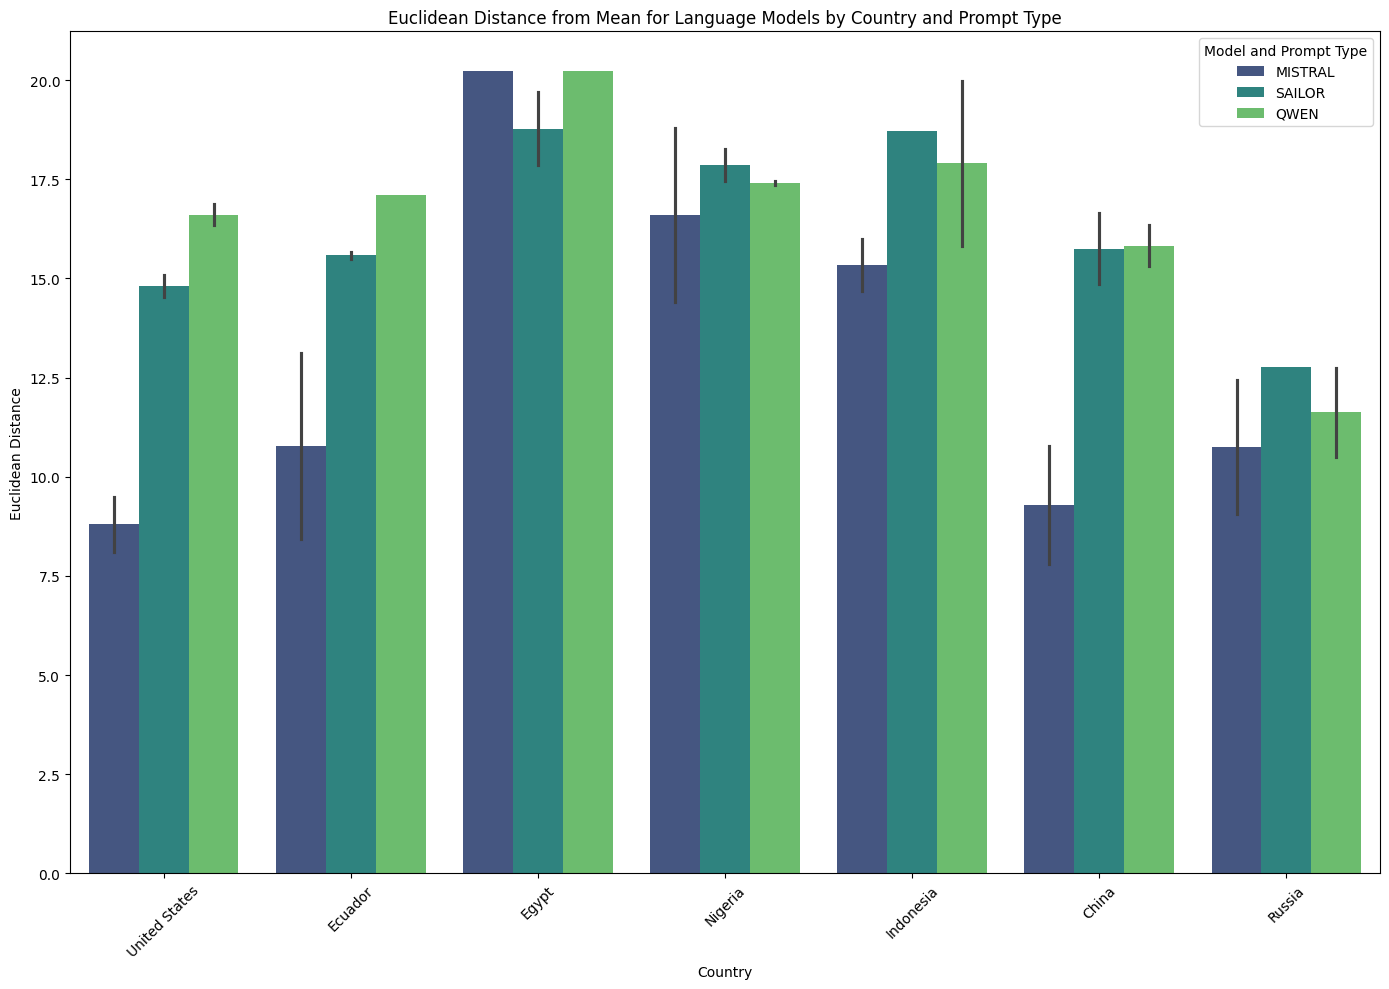

In [389]:
# Let's correct the DataFrame creation according to the structure in the provided code snippet.
import seaborn as sns

import numpy as np

data = {
    'Target Country': ['United States', 'Ecuador', 'Egypt', 'Nigeria', 'Indonesia', 'China', 'Russia'],
    'Languages': ['ENGLISH', 'SPANISH', 'ARABIC', 'HAUSA', 'INDONESIAN', 'MANDARIN', 'RUSSIAN'],
    'MISTRAL Non-country prompt': [9.49, 13.12, 20.22, 18.79, 16.00, 10.77, 12.44],
    'MISTRAL Country prompt': [8.11, 8.42, 20.22, 14.40, 14.68, 7.80, 9.05],
    'SAILOR Non-country prompt': [15.08, 15.49, 19.70, 18.27, 18.71, 14.85, 12.77],
    'SAILOR Country prompt': [14.52, 15.67, 17.86, 17.46, 18.71, 16.65, 12.77],
    'QWEN Non-country prompt': [16.88, 17.11, 20.22, 17.35, 15.83, 16.35, 12.75],
    'QWEN Country prompt': [16.34, 17.11, 20.22, 17.46, 19.99, 15.31, 10.51]
}


# Reformatting the DataFrame with a MultiIndex for columns to match the given structure
df = pd.DataFrame(data, columns=['Target Country', 'Languages', 'MISTRAL Non-country prompt',
                                 'MISTRAL Country prompt', 'SAILOR Non-country prompt',
                                 'SAILOR Country prompt', 'QWEN Non-country prompt',
                                 'QWEN Country prompt'])

df.set_index(['Target Country', 'Languages'], inplace=True)
df.columns = pd.MultiIndex.from_product([['MISTRAL', 'SAILOR', 'QWEN'], ['Non-country prompt', 'Country prompt']])

# Reshaping the data for seaborn's barplot
df_melted = df.melt(ignore_index=False).reset_index()
df_melted.columns = ['Country', 'Language', 'Model', 'Prompt Type', 'Euclidean Distance']

# Since the 'Language' column is not needed for the plot, we can drop it
df_melted.drop('Language', axis=1, inplace=True)

# Create a barplot
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Country', y='Euclidean Distance', hue='Model', data=df_melted, palette='viridis')

# Enhancements
plt.xticks(rotation=45)
plt.title('Euclidean Distance from Mean for Language Models by Country and Prompt Type')
plt.ylabel('Euclidean Distance')
plt.xlabel('Country')
plt.legend(title='Model and Prompt Type', loc='upper right')

plt.tight_layout()  # Adjust layout to fit better
plt.show()


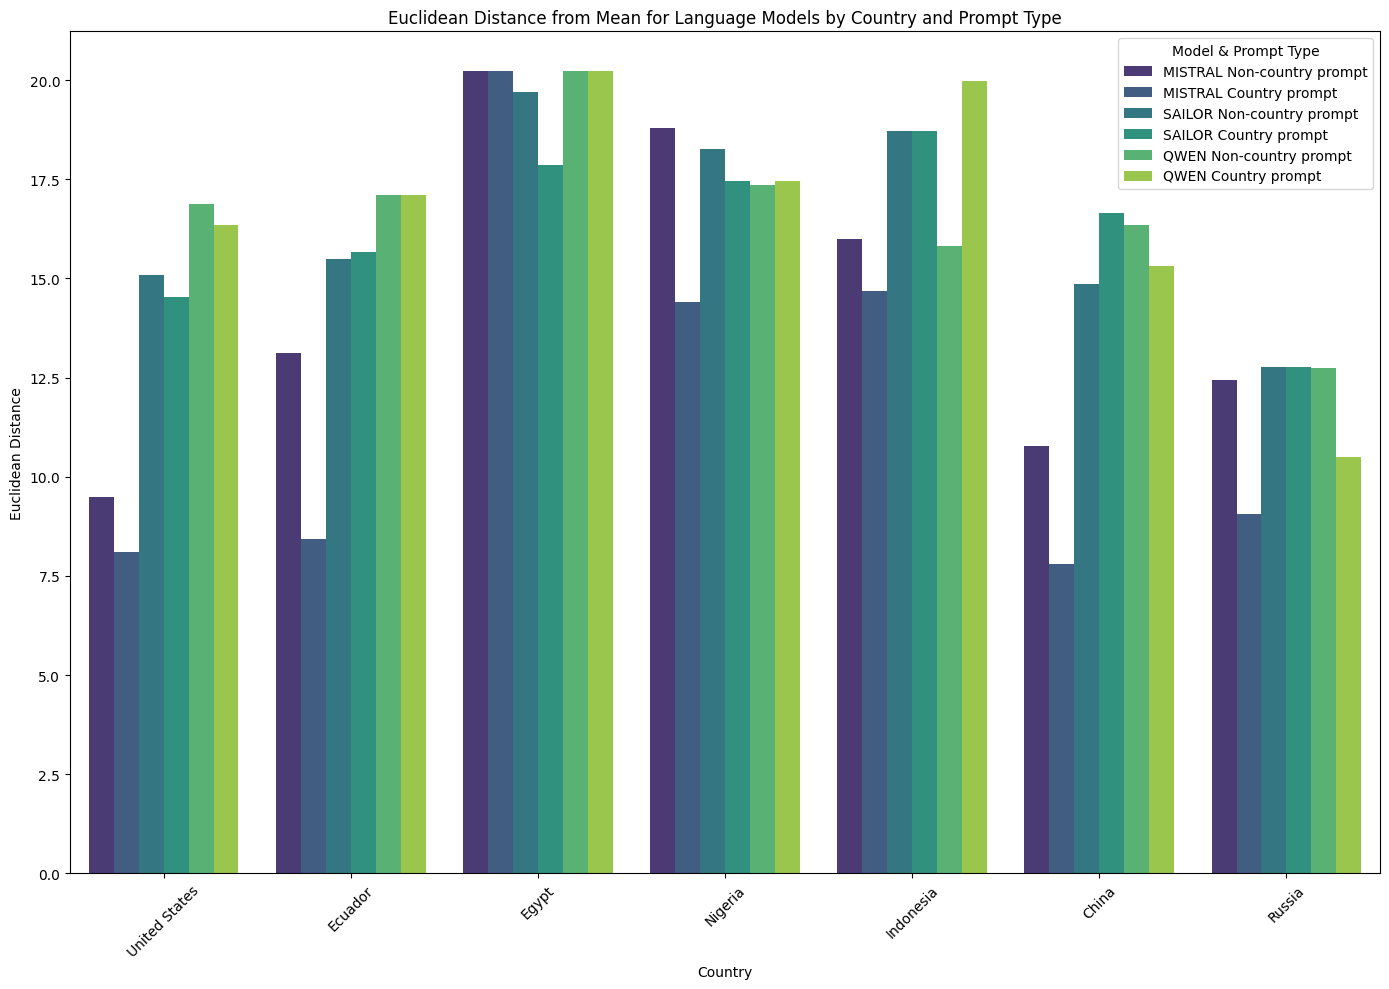

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


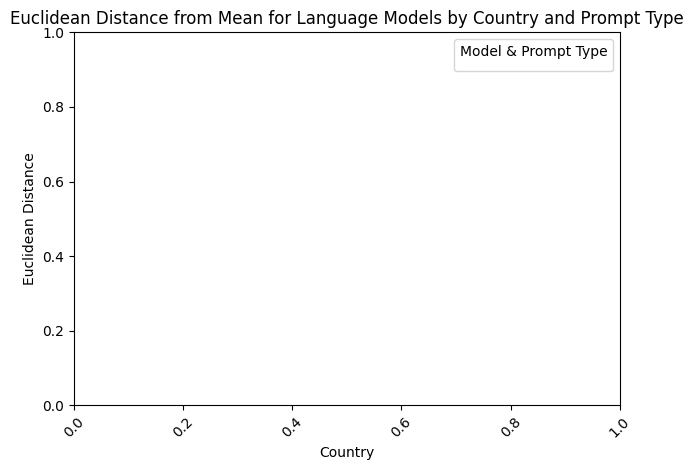

In [392]:
# Let's correct the DataFrame to separate the data according to 'Non-country prompt' and 'Country prompt'.

# Adjusting the MultiIndex to separate Non-country and Country prompts
df.columns = pd.MultiIndex.from_product([['MISTRAL', 'SAILOR', 'QWEN'], ['Non-country prompt', 'Country prompt']], names=['Model', 'Prompt Type'])

# Reshaping the data for seaborn's barplot
df_melted = df.melt(ignore_index=False).reset_index()
df_melted.columns = ['Country', 'Language', 'Model', 'Prompt Type', 'Euclidean Distance']

# Since the 'Language' column is not needed for the plot, we can drop it
df_melted.drop('Language', axis=1, inplace=True)

# Creating a combined column for Model and Prompt Type for the hue in seaborn
df_melted['Model & Prompt'] = df_melted['Model'] + ' ' + df_melted['Prompt Type']

# Create a barplot
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Country', y='Euclidean Distance', hue='Model & Prompt', data=df_melted, palette='viridis')

# Enhancements
plt.xticks(rotation=45)
plt.title('Euclidean Distance from Mean for Language Models by Country and Prompt Type')
plt.ylabel('Euclidean Distance')
plt.xlabel('Country')
plt.legend(title='Model & Prompt Type', loc='upper right')

plt.tight_layout()  # Adjust layout to fit better
plt.show()



# Enhancements

plt.xticks(rotation=45)

plt.title('Euclidean Distance from Mean for Language Models by Country and Prompt Type')

plt.ylabel('Euclidean Distance')

plt.xlabel('Country')

plt.legend(title='Model & Prompt Type', loc='upper right')



plt.tight_layout()  # Adjust layout to fit better

plt.show()

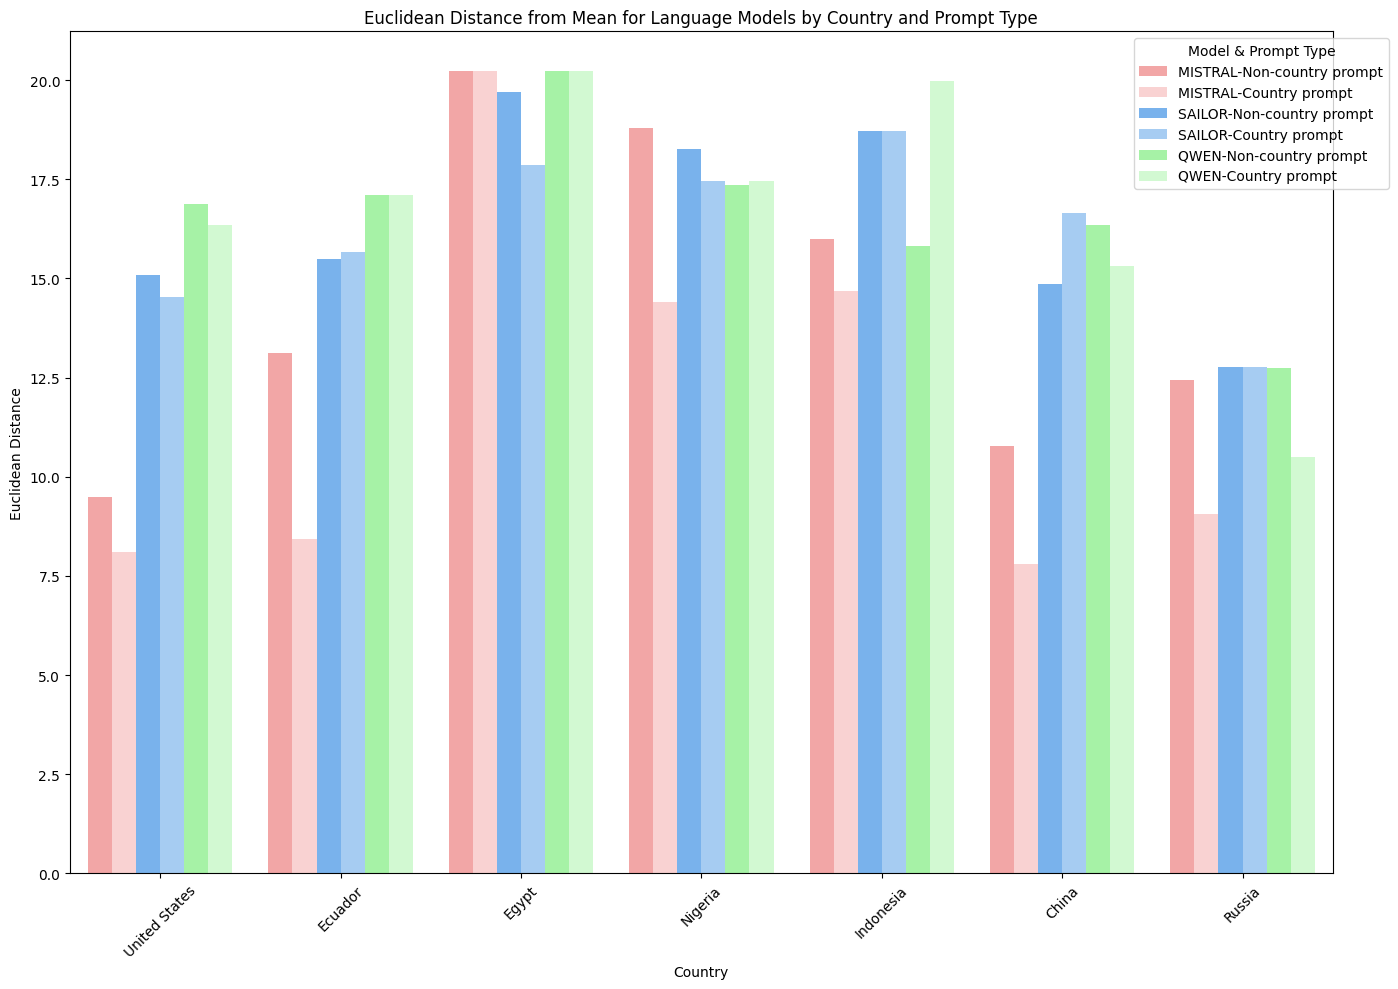

In [398]:
# Adjusting the color palette to increase contrast between different models for clarity
palette = ["#FF9999", "#FFCCCC", "#66B2FF", "#99CCFF", "#99FF99", "#CCFFCC"]
df_melted['Model-Prompt'] = df_melted[['Model', 'Prompt Type']].agg('-'.join, axis=1)

# Create a barplot with a more contrasting color palette
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='Country', 
    y='Euclidean Distance', 
    hue='Model-Prompt', 
    data=df_melted, 
    palette=palette
)

# Enhancements
plt.xticks(rotation=45)
plt.title('Euclidean Distance from Mean for Language Models by Country and Prompt Type')
plt.ylabel('Euclidean Distance')
plt.xlabel('Country')
plt.legend(title='Model & Prompt Type', loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()  # Adjust layout to fit better
plt.show()
